In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import re
import random

plt.rcParams["figure.figsize"]=10,5
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25) 
text_size = 25
line_width = 2.5
plt.style.use('ggplot')
sns.set_palette("twilight")

In [4]:
df = pd.read_csv("training_set_VU_DM.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [158]:
df.shape

(4958347, 54)

In [159]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 55 columns):
srch_id                        int64
date_time                      datetime64[ns]
site_id                        int64
visitor_location_country_id    int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                int64
prop_id                        int64
prop_starrating                int64
prop_review_score              float64
prop_brand_bool                int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                       int64
price_usd                      float64
promotion_flag                 int64
srch_destination_id            int64
srch_length_of_stay            int64
srch_booking_window            int64
srch_adults_count              int64
srch_children_count            int64
srch_room_count                int64
srch_saturday

# Missing values 

In [51]:
# find how many values are missing in the columns
missing_values = df.isna().mean().round(4) * 100
missing_values = pd.DataFrame(missing_values).reset_index()

# rename
missing_values.columns = ["column", "missing"]
# filter where there are missing values
missing_values.query("missing > 0", inplace=True)

In [52]:
# to latex table
print(missing_values.to_latex(index=False))

\begin{tabular}{lr}
\toprule
                    column &  missing \\
\midrule
   visitor\_hist\_starrating &    94.92 \\
      visitor\_hist\_adr\_usd &    94.90 \\
         prop\_review\_score &     0.15 \\
      prop\_location\_score2 &    21.99 \\
 srch\_query\_affinity\_score &    93.60 \\
 orig\_destination\_distance &    32.43 \\
                comp1\_rate &    97.58 \\
                 comp1\_inv &    97.39 \\
   comp1\_rate\_percent\_diff &    98.10 \\
                comp2\_rate &    59.17 \\
                 comp2\_inv &    57.04 \\
   comp2\_rate\_percent\_diff &    88.78 \\
                comp3\_rate &    69.06 \\
                 comp3\_inv &    66.70 \\
   comp3\_rate\_percent\_diff &    90.46 \\
                comp4\_rate &    93.80 \\
                 comp4\_inv &    93.07 \\
   comp4\_rate\_percent\_diff &    97.36 \\
                comp5\_rate &    55.18 \\
                 comp5\_inv &    52.40 \\
   comp5\_rate\_percent\_diff &    83.04 \\
                comp6

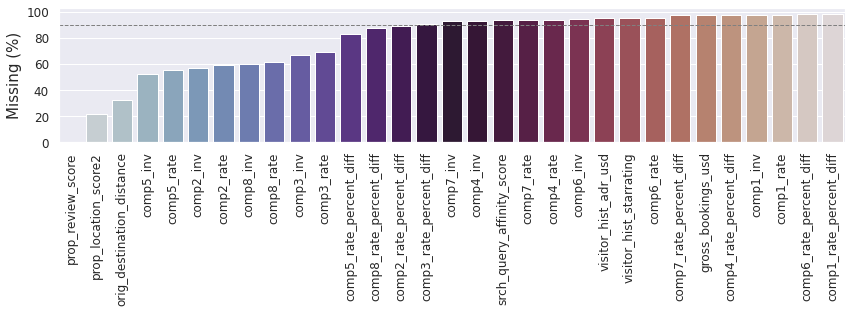

In [53]:
# sort data

missing_values.sort_values("missing", inplace=True)

# plot

sns.set(rc={'figure.figsize':(12,4.5)})

plot=sns.barplot(data = missing_values,
            x = "column",
            y = "missing",
            palette="twilight")
plt.xticks(rotation=90, size = 12)
plt.yticks(size = 12)
plt.axhline(y=90, color='grey', linestyle='--', linewidth=1)
plot.set_ylabel('Missing (%)', size = 15)    
plot.set_xlabel('')
plt.tight_layout()
plt.show() 

In [63]:
missing_values

,column,missing
9,prop_review_score,0.15
12,prop_location_score2,21.99
25,orig_destination_distance,32.43
40,comp5_inv,52.40
39,comp5_rate,55.18
31,comp2_inv,57.04
30,comp2_rate,59.17
49,comp8_inv,59.92
48,comp8_rate,61.34
34,comp3_inv,66.70


In [55]:
len(missing_values)

31

In [ ]:
#reset
plt.rc('ytick', labelsize=25)

In [56]:
# check how many columns have missing values in test data

df_test = pd.read_csv("test_set_VU_DM.csv")

# find how many values are missing in the columns
missing_values_test = df_test.isna().mean().round(4) * 100
missing_values_test = pd.DataFrame(missing_values_test).reset_index()

# rename
missing_values_test.columns = ["column", "missing"]
# filter where there are missing values
missing_values_test.query("missing > 0", inplace=True)



In [62]:
missing_values_test.sort_values("missing", inplace=True)
missing_values_test

,column,missing
9,prop_review_score,0.15
12,prop_location_score2,21.94
24,orig_destination_distance,32.44
39,comp5_inv,52.40
38,comp5_rate,55.20
30,comp2_inv,57.23
29,comp2_rate,59.35
48,comp8_inv,60.22
47,comp8_rate,61.64
33,comp3_inv,66.91


# Overview stats

## srch_id

In [162]:
len(np.unique(df.srch_id))

199795

In [173]:
counts = df.groupby("srch_id").size().reset_index()

np.max(counts.iloc[:,1])

38

## random_bool

In [174]:
df.groupby("random_bool").size()

random_bool
0    3491170
1    1467177
dtype: int64

In [175]:
df.groupby("random_bool")["booking_bool"].mean()

random_bool
0    0.037402
1    0.005325
Name: booking_bool, dtype: float64

In [177]:
df.groupby("random_bool")["click_bool"].mean()

random_bool
0    0.043969
1    0.046604
Name: click_bool, dtype: float64

## date_time

In [6]:
df['just_date'] = df['date_time'].dt.date

date_stats = df.groupby('just_date').size().reset_index()
#date_stats.to_csv("data_dates.csv")

## promotion_flag

In [12]:
df.groupby("promotion_flag")["click_bool"].mean()*100

promotion_flag
0    4.047332
1    6.030111
Name: click_bool, dtype: float64

In [13]:
df.groupby("promotion_flag")["booking_bool"].mean()*100

promotion_flag
0    2.479746
1    3.923515
Name: booking_bool, dtype: float64

In [11]:
df.groupby("promotion_flag").size()

promotion_flag
0    3889229
1    1069118
dtype: int64

## prop_brand_bool

In [14]:
df.groupby("prop_brand_bool")["click_bool"].mean()*100

prop_brand_bool
0    4.451255
1    4.488443
Name: click_bool, dtype: float64

In [15]:
df.groupby("prop_brand_bool")["booking_bool"].mean()*100

prop_brand_bool
0    2.574137
1    2.915896
Name: booking_bool, dtype: float64

In [16]:
df.groupby("prop_brand_bool").size()

prop_brand_bool
0    1811287
1    3147060
dtype: int64

## click_bool and booking_bool

In [17]:
df["click_bool"].mean()*100

4.474858254172207

In [18]:
df["booking_bool"].mean()*100

2.7910511305481442

# Numerical distributions

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

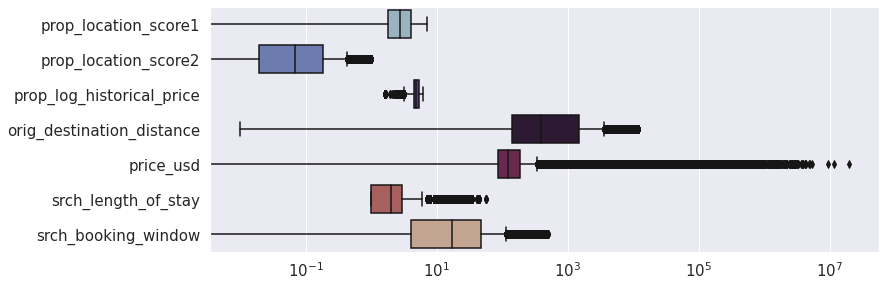

In [48]:
sns.set(rc={'figure.figsize':(12,4.5)})
columns_of_interest = ["prop_location_score1", "prop_location_score2", "prop_log_historical_price", "orig_destination_distance", 
                       "price_usd", "srch_length_of_stay", "srch_booking_window"] #"orig_destination_distance"] #"srch_adults_count",
                        #"srch_children_count" , "srch_room_count", "orig_destination_distance"]
g = sns.boxplot(data=df[columns_of_interest], orient="h", palette="twilight")
g.set_xscale("log")
plt.xticks(size = 15)
plt.yticks(size = 15)

In [47]:
print(np.min(df.price_usd))
print(np.max(df.price_usd))

0.0
19726328.0


# Effect of position

In [49]:
# choose the columns we need
columns_interest = ["position", "booking_bool", "click_bool", "random_bool"]
positions_df = df[columns_interest]

In [50]:
effect_position = positions_df.groupby(["position", "random_bool"]).mean().reset_index()

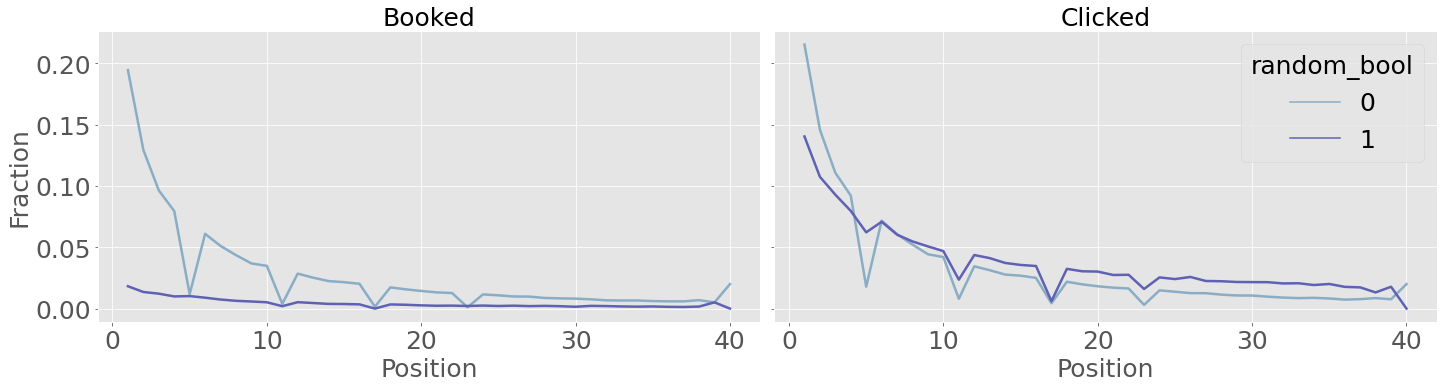

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

# Bulbasaur
sns.lineplot(data=effect_position, 
             x="position", 
             y="booking_bool", 
             hue = "random_bool",
             linewidth = line_width,
             ax = axes[0])

# Charmander
sns.lineplot(data=effect_position, 
             x="position", 
             y="click_bool", 
             hue = "random_bool",
             linewidth = line_width,
             ax = axes[1])

plt.tight_layout()

axes[0].set_title('Booked', size = text_size)
axes[0].set_xlabel('Position', size = text_size) 
axes[0].set_ylabel('Fraction', size = text_size)
axes[0].get_legend().remove() 
axes[1].set_title('Clicked', size = text_size)
axes[1].set_xlabel('Position', size = text_size) 
axes[1].set_ylabel('% booked', size = text_size)
axes[1].legend(title = "random_bool", fontsize=text_size, title_fontsize=text_size)

In [9]:
effect_position[effect_position.random_bool == 0]

,position,random_bool,booking_bool,click_bool
0,1,0,0.194377,0.215201
2,2,0,0.129348,0.145862
4,3,0,0.096330,0.110695
6,4,0,0.079510,0.092075
8,5,0,0.011763,0.017885
10,6,0,0.060947,0.071682
12,7,0,0.051082,0.060645
14,8,0,0.043596,0.052137
16,9,0,0.036805,0.044301
18,10,0,0.034845,0.041991


# Seasonality - fail

In [99]:
import datetime

# extract month from the booking dates column
# create booking start date
temp = df['srch_booking_window'].apply(lambda x: pd.Timedelta(x, unit='D'))
df['book_start_date'] = df['date_time'] + temp

In [100]:
# extract month from the 'book_start_date'
df['book_month'] = pd.DatetimeIndex(df['book_start_date']).month

In [237]:
# filter for hotels that appeared in more than one month
to_filter = df.groupby(["prop_id", "book_month"]).size().reset_index().groupby(["prop_id"]).size().reset_index()
print(len(to_filter))
# rename
to_filter.columns = ["prop_id", "months"]
# filter where there are missing values
to_filter.query("months > 1", inplace=True)
print(len(to_filter))
# filter the values
df_filtered = df[df['prop_id'].isin(to_filter['prop_id'])]

129113
114144


In [238]:
# group by prop, then by prop and month and calculate mean of booking_bool
per_prop = df_filtered.groupby(["prop_id"])["booking_bool"].mean().reset_index()
per_prop_month = df_filtered.groupby(["prop_id", "book_month"])["booking_bool"].mean().reset_index()

# join the dataframes

joined = pd.merge(per_prop_month, per_prop, how="left", on="prop_id", suffixes=("_month", "_all"))


In [239]:
# calculate the difference between booking_bool_month and booking_bool_all

joined["diff"] = joined["booking_bool_all"] - joined["booking_bool_month"]
# calculate mean difference per prop id

means = joined.groupby("prop_id")["diff"].mean().reset_index()

(0.0, 81320.4)

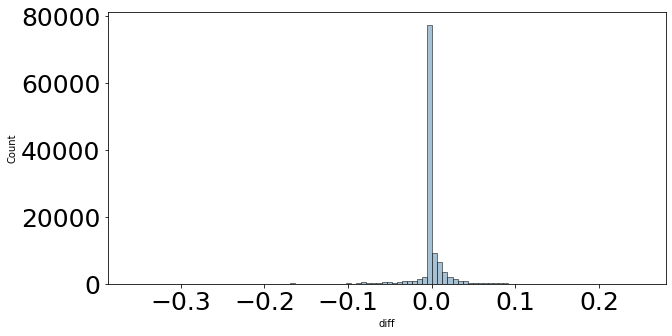

In [240]:
sns.histplot(means["diff"], bins = 100)
plt.ylim()

In [219]:
import scipy.stats as stats

stats.wilcoxon(means["diff"][0:10000])

WilcoxonResult(statistic=1935097.5, pvalue=1.1127879703082833e-35)

# Seasonality -  2nd try

In [154]:
# create season column
def return_season(x):
    if x in [12, 1, 2]:
        return "winter"
    elif x in [3, 4, 5]:
        return "spring"
    elif x in [6, 7, 8]:
        return "summer"
    else:
        return "autumn"

seasons = df['book_month'].apply(lambda x: return_season(x))
#perform same analysis, but on date_time (uncomment two lines below to run)
#df["search_month"] = pd.DatetimeIndex(df['date_time']).month
#seasons = df['search_month'].apply(lambda x: return_season(x))
df["season"] = seasons

In [155]:
#find prop_id that appear in more than one seson

seasons_per_prop_id = df.groupby(["prop_id","season"]).size().groupby(["prop_id"]).size().reset_index()
seasons_per_prop_id.columns = ["prop_id", "count"]
selected_prop_id = seasons_per_prop_id[seasons_per_prop_id["count"] > 1]["prop_id"]


In [156]:
# filter for these prop_id

df_filtered = df[df["prop_id"].isin(selected_prop_id)]

In [157]:
# group by prop, then by prop and season and calculate mean of booking_bool
per_prop = df_filtered.groupby(["prop_id"])["booking_bool"].mean().reset_index()
per_prop_month = df_filtered.groupby(["prop_id", "season"])["booking_bool"].mean().reset_index()

# join the dataframes

joined = pd.merge(per_prop_month, per_prop, how="left", on="prop_id", suffixes=("_season", "_all"))

In [158]:
# calculate the difference between booking_bool_month and booking_bool_all

joined["diff"] = joined["booking_bool_all"] - joined["booking_bool_season"]
# calculate mean difference per prop id

means = joined.groupby("prop_id")["diff"].mean().reset_index()

(0.0, 80871.0)

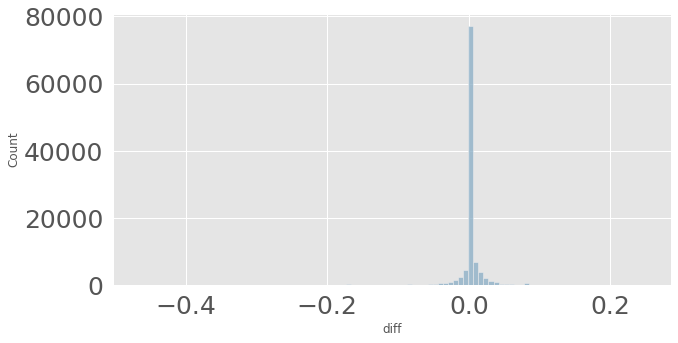

In [159]:
sns.histplot(means["diff"], bins = 100)
plt.ylim()

In [160]:
import scipy.stats as stats

stats.wilcoxon(means["diff"])

WilcoxonResult(statistic=327792104.5, pvalue=0.0)

# Price rank

In [53]:
# create a price rank column
ranks = df.groupby('srch_id')['price_usd'].rank(ascending=True, method = "dense")

df["price_rank"] = ranks

In [54]:
effect_price_position = df.groupby(["random_bool", "price_rank"])["booking_bool", "click_bool"].mean().reset_index()

In [55]:
effect_price_position.head()

,random_bool,price_rank,booking_bool,click_bool
0,0,1.0,0.069141,0.078832
1,0,2.0,0.061810,0.071348
2,0,3.0,0.056259,0.065456
3,0,4.0,0.053518,0.062372
4,0,5.0,0.049912,0.058129


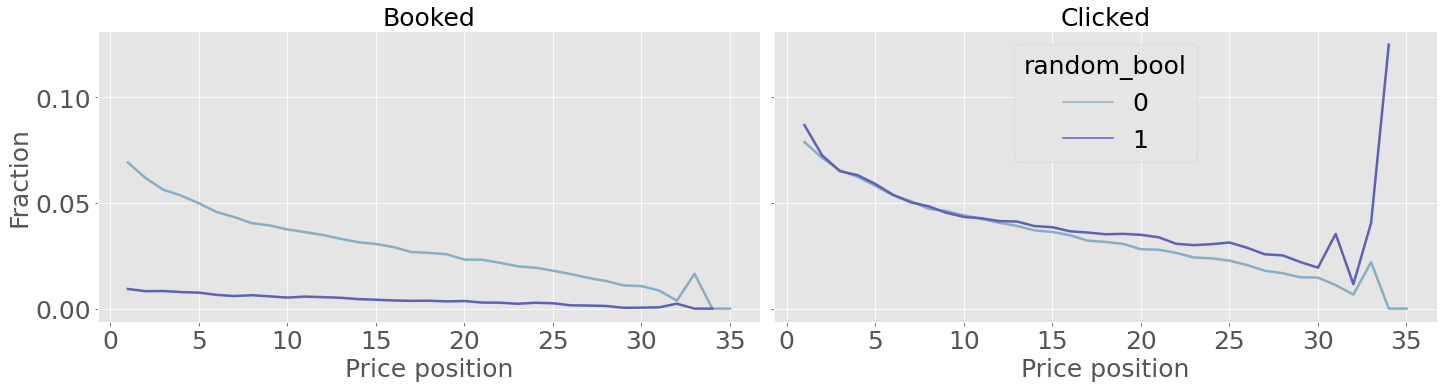

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

# Bulbasaur
sns.lineplot(data=effect_price_position, 
             x="price_rank", 
             y="booking_bool", 
             hue = "random_bool",
             linewidth = line_width,
             ax = axes[0])

# Charmander
sns.lineplot(data=effect_price_position, 
             x="price_rank", 
             y="click_bool", 
             hue = "random_bool",
             linewidth = line_width,
             ax = axes[1])

plt.tight_layout()

axes[0].set_title('Booked', size = text_size)
axes[0].set_xlabel('Price position', size = text_size) 
axes[0].set_ylabel('Fraction', size = text_size)
axes[0].get_legend().remove() 
axes[1].set_title('Clicked', size = text_size)
axes[1].set_xlabel('Price position', size = text_size) 
axes[1].set_ylabel('% booked', size = text_size)
axes[1].legend(title = "random_bool", fontsize=text_size, title_fontsize=text_size)

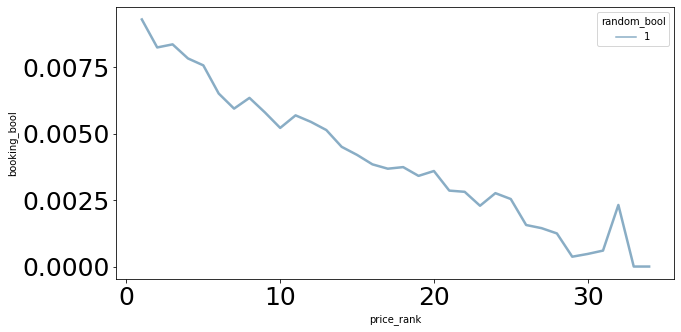

In [30]:
sns.lineplot(data=effect_price_position[effect_price_position.random_bool == 1], 
             x="price_rank", 
             y="booking_bool", 
             hue = "random_bool",
             linewidth = line_width,
             )

In [26]:
# let's see why there is a spike

df[df["random_bool"] == 1] .groupby('price_rank').size()

price_rank
1.0     66102
2.0     68967
3.0     70760
4.0     71838
5.0     71935
6.0     70724
7.0     69228
8.0     67823
9.0     66066
10.0    64284
11.0    62640
12.0    60875
13.0    59242
14.0    57335
15.0    55278
16.0    53104
17.0    50846
18.0    48692
19.0    46068
20.0    43721
21.0    40990
22.0    38086
23.0    35008
24.0    31538
25.0    27579
26.0    23060
27.0    18013
28.0    12851
29.0     8112
30.0     4229
31.0     1669
32.0      432
33.0       74
34.0        8
dtype: int64

# Feature engineering experimentation

In [12]:
### mean, median and std
columns = ["prop_starrating", "prop_review_score", "prop_location_score1", "prop_location_score2"]
group_by = ["prop_id"]

In [47]:
means = df.groupby(group_by)[columns].mean().reset_index()
means.columns = [means.columns[0]] + [x + "_mean" for x in means.columns[1:]]
means

,prop_id,prop_starrating_mean,prop_review_score_mean,prop_location_score1_mean,prop_location_score2_mean
0,1,2,0.0,3.04,NaN
1,2,0,4.0,0.69,0.036100
2,3,3,3.5,0.69,0.035055
3,4,5,4.5,4.88,0.115500
4,5,0,0.0,6.02,NaN
...,...,...,...,...,...
129108,140817,2,3.0,4.43,0.143200
129109,140818,3,0.0,4.17,0.068500
129110,140819,3,4.0,5.37,0.106100
129111,140820,4,0.0,3.87,NaN


In [48]:
df[["prop_id", 'prop_starrating']].join(means, on = "prop_id", rsuffix='blah' )

,prop_id,prop_starrating,prop_idblah,prop_starrating_mean,prop_review_score_mean,prop_location_score1_mean,prop_location_score2_mean
0,893,3,973.0,3.0,4.0,1.79,0.090600
1,10404,4,11288.0,4.0,4.0,1.61,0.006800
2,21315,3,23197.0,4.0,0.0,5.50,0.033843
3,27348,2,29737.0,0.0,4.0,1.79,NaN
4,29604,4,32206.0,3.0,0.0,3.93,NaN
...,...,...,...,...,...,...,...
4958342,77700,3,84723.0,3.0,3.5,2.83,0.028228
4958343,88083,3,96070.0,0.0,0.0,1.95,NaN
4958344,94508,3,103077.0,2.0,0.0,3.89,NaN
4958345,128360,3,139993.0,0.0,4.5,1.39,0.004200


In [57]:
pd.merge(df[["prop_id", 'prop_starrating']], means, on="prop_id")

,prop_id,prop_starrating,prop_starrating_mean,prop_review_score_mean,prop_location_score1_mean,prop_location_score2_mean
0,893,3,3,3.5,2.83,0.056174
1,893,3,3,3.5,2.83,0.056174
2,893,3,3,3.5,2.83,0.056174
3,893,3,3,3.5,2.83,0.056174
4,893,3,3,3.5,2.83,0.056174
...,...,...,...,...,...,...
4958342,93842,3,3,4.0,1.61,NaN
4958343,103277,3,3,5.0,0.69,0.024200
4958344,135856,4,4,3.5,2.30,0.141500
4958345,2284,0,0,0.0,0.00,NaN


In [60]:
# caulcate means and rename columns
historical = df.groupby(group_by)[["click_bool", "booking_bool"]].mean().reset_index()
historical.columns = [historical.columns[0]] + [x + "_rate" for x in historical.columns[1:]]
pd.merge(df, historical, on="prop_id")

In [ ]:
means.columns = [means.columns[0]] + [x + "_mean" for x in means.columns[1:]]
df = pd.merge(df, means, on=group_by)

## check how much prop_ids overlap

In [2]:
df_test = pd.read_csv("test_set_VU_DM.csv")

In [16]:
list_original = np.unique(df.prop_id)
len(list_original)

129113

In [17]:
list_test = np.unique(df_test.prop_id)
len(list_test)

129438

In [18]:
appeared = 0

for i in list_original:
    if i in list_test:
        appeared += 1

In [19]:
appeared

121665